In [89]:
import torch 
import torch.nn as nn 
import torchvision 
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt 

In [90]:
train_dataset = torchvision.datasets.MNIST(root="./",download=True,train=True,transform=transforms.ToTensor())

In [91]:
test_dataset = torchvision.datasets.MNIST(root="./",download=False,train=False,transform=transforms.ToTensor())

In [92]:
batch_size = 128
train_loaders = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loaders = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [93]:
samples,labels = iter(train_loaders).next()

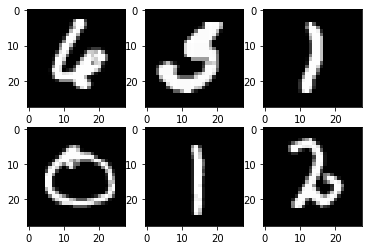

In [94]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap="gray")
plt.show()  

In [95]:
samples.shape , labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [96]:
input_size = 784 
hidden_size = 128 
num_class = 10

In [97]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_class):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_class)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out



In [98]:
model = NeuralNet(input_size,hidden_size,num_class)

In [99]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr= 0.001)

In [100]:
num_ephos = 10
total_step = len(train_loaders)
for ephos in range(num_ephos):
  for i,(images,labels) in enumerate(train_loaders):
    images = images.view(-1,784)
    output = model(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if(i+1)%100 == 0:
      print(f"ephos{ephos+1}/{num_ephos},steps {i+1}/{total_step}, loss{loss.item():.4f}")

ephos1/10,steps 100/469, loss0.4926
ephos1/10,steps 200/469, loss0.2505
ephos1/10,steps 300/469, loss0.2823
ephos1/10,steps 400/469, loss0.1785
ephos2/10,steps 100/469, loss0.1444
ephos2/10,steps 200/469, loss0.1629
ephos2/10,steps 300/469, loss0.1994
ephos2/10,steps 400/469, loss0.1160
ephos3/10,steps 100/469, loss0.2175
ephos3/10,steps 200/469, loss0.1047
ephos3/10,steps 300/469, loss0.0958
ephos3/10,steps 400/469, loss0.1185
ephos4/10,steps 100/469, loss0.1511
ephos4/10,steps 200/469, loss0.1277
ephos4/10,steps 300/469, loss0.0649
ephos4/10,steps 400/469, loss0.0765
ephos5/10,steps 100/469, loss0.2602
ephos5/10,steps 200/469, loss0.0827
ephos5/10,steps 300/469, loss0.1328
ephos5/10,steps 400/469, loss0.0505
ephos6/10,steps 100/469, loss0.0677
ephos6/10,steps 200/469, loss0.0923
ephos6/10,steps 300/469, loss0.0831
ephos6/10,steps 400/469, loss0.0904
ephos7/10,steps 100/469, loss0.0131
ephos7/10,steps 200/469, loss0.0411
ephos7/10,steps 300/469, loss0.1687
ephos7/10,steps 400/469, los

In [101]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0 
  for i ,(images,labels) in enumerate(train_loaders):
    images = images.view(-1,784)
    output = model(images)
    _,prediction = torch.max(output,1)
    n_samples += labels.shape[0]
    n_correct += (prediction == labels).sum().item()


In [102]:
acc  = 100.0 * n_correct/n_samples
print(f"accuracy {acc}")

accuracy 99.16166666666666
